# Relative feature tightness of fragments using part 6 for test data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import numpy as np

from ast import literal_eval
import re
import sys
sys.path.insert(0,"./../fip3")
from fip import profiles

## Dataset prep

### Making feature pointwise mutual information profiles

In [2]:
profile0 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp0_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile1 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp1_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile2 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp2_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile3 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp3_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile4 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp4_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile5 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp5_38630.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38630)
profile7 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp7_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)
profile8 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp8_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)
profile9 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/COCONUT/COCOp9_38629.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=38629)

In [3]:
profile0.add_another_cooccurrence_profile(profile1)
profile0.add_another_cooccurrence_profile(profile2)
profile0.add_another_cooccurrence_profile(profile3)
profile0.add_another_cooccurrence_profile(profile4)
profile0.add_another_cooccurrence_profile(profile5)
profile0.add_another_cooccurrence_profile(profile7)
profile0.add_another_cooccurrence_profile(profile8)
profile0.add_another_cooccurrence_profile(profile9)

In [4]:
probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(profile0)

In [5]:
reference_profile0 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp0_37902.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37902)
reference_profile1 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp1_37902.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37902)
reference_profile2 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp2_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile3 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp3_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile4 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp4_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile5 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp5_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile7 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp7_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile8 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp8_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)
reference_profile9 = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CPF/ZINC/ZINCp9_37901.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=37901)

In [6]:
reference_profile0.add_another_cooccurrence_profile(reference_profile1)
reference_profile0.add_another_cooccurrence_profile(reference_profile2)
reference_profile0.add_another_cooccurrence_profile(reference_profile3)
reference_profile0.add_another_cooccurrence_profile(reference_profile4)
reference_profile0.add_another_cooccurrence_profile(reference_profile5)
reference_profile0.add_another_cooccurrence_profile(reference_profile7)
reference_profile0.add_another_cooccurrence_profile(reference_profile8)
reference_profile0.add_another_cooccurrence_profile(reference_profile9)

In [7]:
reference_probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(reference_profile0)

### Making feature pointwise KL divergence profile between COCONUT and ZINC

In [8]:
difference_pkld_profile = profiles.PointwiseKLDivergenceProfile.from_cooccurrence_probability_profiles(
    probability_profile, reference_probability_profile)
difference_pkld_profile.df

value
feature1                           feature2                                                
[CH2][CH2][CH2][CH2][CH]           [CH2][CH2][CH2][CH2][CH]                        1.846115
                                   [CH2][CH2][CH]([C]([CH2])=[O])[CH]([CH2])[CH2]  3.431967
                                   [CH2][CH2][C](=[O])[CH]([CH2])[CH]              4.938319
                                   [CH3][CH2][CH2][CH2]                            4.200517
                                   [CH3][CH2][CH2][CH2][CH2]                       4.470740
...                                                                                     ...
[CH][CH2][CH2][S]([CH2])(=[O])=[O] [CH][NH][CH2][S]([CH2])(=[O])=[O]              -0.027469
                                   [C][CH]([CH2])[NH][CH2][S]                     -0.027469
[CH][NH][CH2][S]([CH2])(=[O])=[O]  [C][CH]([CH2])[NH][CH2][S]                     -0.027469
                                   [C][CH]([NH])[CH2][CH2][S]                     -0.027469
[C][CH]([CH2])[NH][CH2][S]         [C][CH]([NH])[CH2][CH2][S]                     -0.027469

[28964760 rows x 1 columns]

### Sampling structures from COCONUT and ZINC datasets

In [9]:
coconut_samples = pd.read_csv('../data/CPF/COCONUT/COCOrandomF.csv', delimiter = ' ')
coconut_samples = coconut_samples.drop(['Coconut_id'], axis=1)
coconut_samples['Name'] = 'COCONUT'

In [10]:
df_split_coco = np.array_split(coconut_samples, 10)

In [11]:
df_split_coco[6]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset,Fragments
231780,COc1ccc(CCNC(=O)NC2CCCc3c2[nH]c2ccccc32)cc1OC,393.205242,4.1044,CIADASUGTCFGAR-UHFFFAOYSA-N,CIADASUGTCFGAR,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 94, 98, 104, 119, 140, 197, 249, 285, 310...","'[cH][cH][cH][cH][c]', '[CH2][NH][C](=[O])[NH]..."
231781,CC(=CC(=O)O)C1C(C)=CC2CC(C)CCC2C1(C)C(O)=C1C(=...,477.251523,4.7744,LFSBABSKEGZWJN-UHFFFAOYSA-N,LFSBABSKEGZWJN,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 115, 171, 241, 276, 284, 301, 314, 385, 3...","'[cH][cH][cH][cH][cH]', '[C][CH]([C])[C]([CH3]..."
231782,C=C1C(O)CC2C(C)(COC(C)=O)CC(O)CC2(C)C1CCC(C)=C...,464.313789,4.5858,PQCWDDLBWXLLJD-UHFFFAOYSA-N,PQCWDDLBWXLLJD,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 35, 43, 56, 68, 80, 147, 184, 283, 285, 29...",'[CH][CH2][CH]([C]([CH3])([CH2])[CH2])[C]([CH2...
231783,O=C(C=Cc1cc(O)c(O)cc1C=Cc1cc(O)c(O)cc1CCCO)OC(...,551.155885,1.9331,KRPZIDMIHPFYRP-UHFFFAOYSA-M,KRPZIDMIHPFYRP,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 31, 69, 79, 80, 144, 176, 180, 193, 205, 2...","'[cH][cH][c]([OH])[c]([cH])[OH]', '[C][CH]([O]..."
231784,CC1(C)OC2CC(CO)OC2O1,174.089209,0.2452,CGUKUJDDXZARJQ-UHFFFAOYSA-N,CGUKUJDDXZARJQ,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[72, 80, 222, 656, 707, 807, 924, 926, 1019, 1...","'[CH2][CH]([CH2])[O][CH]([CH])[O]', '[CH][O][C..."
...,...,...,...,...,...,...,...,...,...
270405,COc1cc(O)c(CCC(=O)c2ccc(O)c(OC)c2)c(OC)c1,332.125988,2.9391,GPKHOPXMGBTRQX-UHFFFAOYSA-N,GPKHOPXMGBTRQX,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[2, 80, 104, 249, 322, 428, 614, 635, 650, 679...","'[cH][c]([cH])[C](=[O])[CH2][CH2]', '[c][cH][c..."
270406,O=C1CCc2cc(c(O)c(OC3CCCC3)c2)Cc2cccc(c2)C2CCC(...,829.410184,9.4899,JXGZPMZIVFFKHB-UHFFFAOYSA-N,JXGZPMZIVFFKHB,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[3, 8, 39, 80, 84, 106, 119, 142, 148, 200, 20...","'[c][c-]([CH])[cH][cH][n]', '[c][O][CH]([CH2][..."
270407,C=CC1(C)C=C2C(=O)CC3C(C)(C)CCCC3(C)C2C(=O)C1,300.208930,4.4995,TVYGAJGRAAEXLR-UHFFFAOYSA-N,TVYGAJGRAAEXLR,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[47, 86, 178, 231, 314, 333, 370, 478, 513, 56...",'[C][C](=[CH])[CH]([C]([CH2])=[O])[C]([CH])([C...
270408,COc1cccc(CN2CCC(C)(O)C(NC(=O)C3CCCC3)C2c2ccccc...,422.256943,4.0682,OPBNGPDDNDPFDF-UHFFFAOYSA-N,OPBNGPDDNDPFDF,COCONUT,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 322, 387, 389, 511, 541, 559, 562, 570, 6...","'[cH][cH][c]([cH][cH])[CH]([CH])[N]', '[cH][cH..."


In [12]:
zinc_samples = pd.read_csv('../data/CPF/ZINC/ZINCrandomF.csv', delimiter = ' ')
zinc_samples = zinc_samples.drop(['Zinc_id'], axis=1)

In [13]:
df_split_zinc = np.array_split(zinc_samples, 10)
df_split_zinc[6]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset,Fragments
227408,CCOC(=O)c1cccc(NC(=O)[C@H](C)Oc2ccccc2OC)c1C,357.157623,3.58632,BRURSKIHKPKWSB-AWEZNQCLSA-N,BRURSKIHKPKWSB,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 80, 140, 145, 147, 249, 252, 283, 294, 410...","'[C][CH]([CH3])[O][c]([cH])[c]', '[cH][cH][cH]..."
227409,C[C@@H](OC(=O)CCc1ncc(-c2c(F)cccc2F)o1)C(=O)Nc...,468.110848,5.14160,GDMUWRYMXSPWHN-GFCCVEGCSA-N,GDMUWRYMXSPWHN,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 45, 69, 80, 114, 121, 126, 191, 283, 378, ...","'[C][CH]([CH3])[O][C]([CH2])=[O]', '[C][O][CH]..."
227410,Cc1cccc(N(CC(=O)NCCOc2ccc(S(=O)(=O)N3CCCCC3)cc...,523.181078,2.43924,ZYEIVLJWTYAKDB-UHFFFAOYSA-N,ZYEIVLJWTYAKDB,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[2, 13, 41, 80, 81, 102, 197, 252, 319, 322, 3...","'[cH][cH][cH][c]([c])[N]', '[cH][cH][c]([cH][c..."
227411,C[C@H]1C[C@H](C)CN(c2nnc(-c3cn(CCCC#N)nn3)n2C)C1,328.212393,1.85968,QNSJXCMZINRKQF-STQMWFEESA-N,QNSJXCMZINRKQF,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 80, 192, 244, 281, 378, 407, 413, 421, 437...","'[c]-[c]([n])[cH][n]([CH2])[n]', '[c][N]([CH2]..."
227412,CC(=O)c1cccc(NC(=O)Cn2c(=O)n(CCC(=O)N3CCCCC3)c...,482.162391,2.46860,ZEMJFQNSWYWWPM-UHFFFAOYSA-N,ZEMJFQNSWYWWPM,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[2, 14, 41, 45, 80, 131, 184, 191, 314, 360, 3...","'[CH2][CH2][CH2][CH2][N]', '[C][c]([cH])[cH][c..."
...,...,...,...,...,...,...,...,...,...
265304,CC[C@H](C(=O)NC(C)C)N(Cc1ccc(OC)cc1)C(=O)CN(c1...,565.261042,4.83934,ANRHNCDPFQOYRE-GDLZYMKVSA-N,ANRHNCDPFQOYRE,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 80, 117, 235, 271, 283, 288, 294, 310, 319...","'[cH][cH][c]([CH3])[cH][cH]', '[cH][cH][c]([cH..."
265305,Cc1cccc(CNC(=O)Cc2ccc(-c3ccccc3)cc2)c1,315.162314,4.52092,PETCLXICKQDPIK-UHFFFAOYSA-N,PETCLXICKQDPIK,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[41, 80, 197, 255, 310, 325, 333, 389, 650, 73...","'[C][CH2][c]([cH][cH])[cH][cH]', '[c][cH][cH][..."
265306,CC(C)NC(=O)CSc1ncc(-c2ccc(Cl)c(Cl)c2)n1-c1ccc(...,503.044888,6.36140,OMJQFCFHDPZUOF-UHFFFAOYSA-N,OMJQFCFHDPZUOF,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 41, 58, 80, 114, 116, 117, 145, 233, 283, ...","'[c]-[n]([c])[c]([cH][n])-[c]([cH])[cH]', '[CH..."
265307,CC(=O)N1CC[C@@H](O)[C@@H]2[C@@H](C1)N(Cc1ccncc...,365.210327,2.27890,UGZNCYDSZIWMCF-CBPXPLCBSA-N,UGZNCYDSZIWMCF,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 378, 383, 389, 455, 493, 570, 573, 650, 6...","'[CH2][CH2][N]([CH2][CH])[C]([CH3])=[O]', '[CH..."


In [14]:
joint_samples = pd.concat((df_split_coco[6], df_split_zinc[6]), ignore_index=True)

In [15]:
for x in joint_samples.index:
    a = joint_samples['Fragments'][x]
    tup = literal_eval(a)
    joint_samples['Fragments'][x] = tup

/var/tmp/pbs.43587.lich-compute.vscht.cz/ipykernel_35849/2190264476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_samples['Fragments'][x] = tup


## Relative feature tightness against a PMI interrelation profile

In [16]:
joint_samples['RFT'] = joint_samples['Fragments'].apply(
    lambda x: difference_pkld_profile.relative_feature_divergence(x))

/home/liskovaf/.conda/envs/coco/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


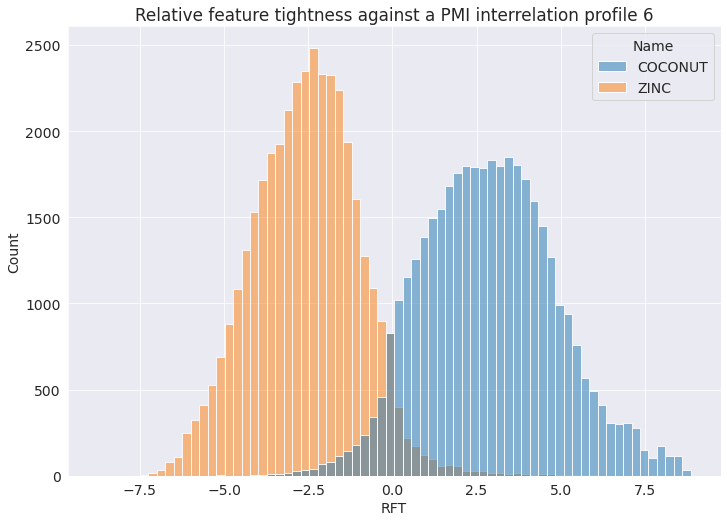

In [17]:
plt.rcParams['font.size'] = '14'
a4_dims = (11.7, 8.27)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(joint_samples, x='RFT', hue='Name')
plt.title('Relative feature tightness against a PMI interrelation profile 6')
plt.savefig(f"../images//joint_samples_RFT6F.svg", format="svg")

According to the histogram, there is a visible split between Relative feature tightness distribution against the pointwise KL divergence profile between COCONUT and ZINC datasets, based on their radius 2 fragments. Larger fragments might diverge even further.

# ROC curve

In [19]:
joint_samples[joint_samples['RFT'].isna()]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset,Fragments,RFT
52175,CS(C)(=O)=S,109.986007,-0.0077,NOUFRWSYVXTZRB-UHFFFAOYSA-N,NOUFRWSYVXTZRB,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[97, 350, 519, 650, 679, 692, 1057, 1476]",{},NaN
65350,NS(=O)(=O)O,96.983364,-1.2521,IIACRCGMVDHOTQ-UHFFFAOYSA-N,IIACRCGMVDHOTQ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[350, 592, 650, 807, 1171, 1230, 1476, 1607]",{},NaN
67747,F[Sn-](F)F,176.897953,0.8798,RJQSHXOCZNMEKH-UHFFFAOYSA-K,RJQSHXOCZNMEKH,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[988, 1266, 1863, 1928]",{},NaN


In [20]:
joint_samples = joint_samples[joint_samples['RFT'].notna()]

In [21]:
joint_samples[joint_samples['RFT'].isna()]

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset,Fragments,RFT


In [22]:
from matplotlib.pyplot import figure
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(joint_samples['Name'], joint_samples['RFT'], pos_label = 'COCONUT')
roc_auc = metrics.auc(fpr, tpr)

In [23]:
roc_auc

0.9856400452639426

<Figure size 432x288 with 0 Axes>

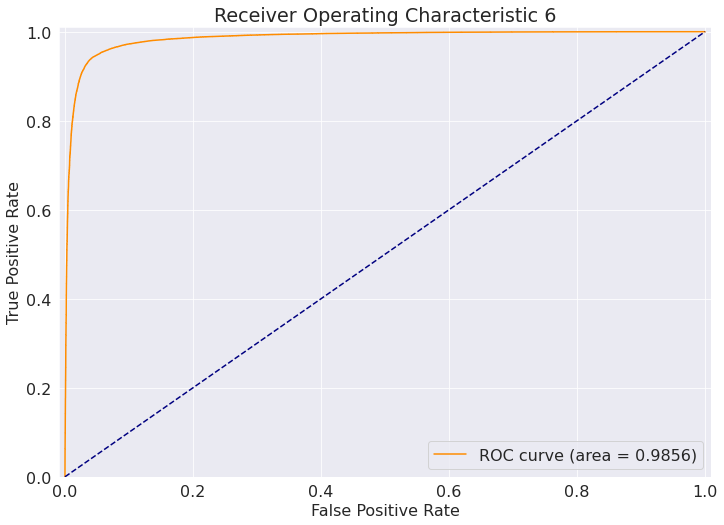

In [25]:
plt.rcParams['font.size'] = '16'
plt.figure()
figure(figsize=(11.7, 8.27))
plt.plot(fpr,tpr,color="darkorange",label="ROC curve (area = %0.4f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic 6')
plt.legend(loc="lower right")
plt.savefig(f"../images//joint_samples_ROC6F.svg", format="svg")
plt.show()